<a href="https://colab.research.google.com/github/Hajar-Chlouh/airtraffic/blob/main/notebooks/analyze_traffic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

extract_df.sort_values('movementDate').astype.({movementDte:'datetime64[ns]})head(50_000).to_parquet('traffic_light.parquet')*testo in corsivo*

---



In [1]:
!pip install --upgrade pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.9/344.9 KB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 115.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 11.4 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.

In [2]:
!pip install mlforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.3/240.3 KB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 KB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.8/187.8 KB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 KB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 KB 19.2 MB/s eta 0:00:00
  Created wheel for fugue-sql-antlr: filename=fugue_sql_antlr-0.1.5-py3-none-any.whl size=157611 sha256=75e18cbc76c43f23c6b8509b31b501d54a5983367468b9ccb0ce301f58b941fc
  Stored in directory: /root/.cache/pip/wheels/61/d4/e5/7c90c375fba26867c6ec01bccb003b4cb983fe8386f2e0ffe0
Successfully buil

# Analyze traffic dataset ✈

In [3]:
import pandas as pd
from pandas_profiling import ProfileReport
#pr

<ipython-input-3-61b2e32ad12b>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [4]:
traffic_df=pd.read_parquet("traffic_10lines.parquet")

In [5]:
traffic_df.info()
traffic_df.describe(include='all').transpose()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254899 entries, 3223247 to 10014282
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date                254899 non-null  datetime64[ns]
 1   pax                 254899 non-null  float64       
 2   seats               250749 non-null  float64       
 3   flight_type         251168 non-null  object        
 4   flight_typename     254899 non-null  object        
 5   home_airport        254899 non-null  object        
 6   paired_airport      254899 non-null  object        
 7   home_airportname    254899 non-null  object        
 8   paired_airportname  254899 non-null  object        
 9   distance            254899 non-null  Int64         
 10  flight_number       251438 non-null  object        
 11  airline_iata        248648 non-null  object        
 12  airline_name        254813 non-null  object        
 13  scheduled_datetime  2

<ipython-input-5-8803860610aa>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  traffic_df.describe(include='all').transpose()
<ipython-input-5-8803860610aa>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  traffic_df.describe(include='all').transpose()


count  unique                  top    freq  \
date                  254899    2626  2019-01-02 00:00:00     165   
pax                 254899.0     NaN                  NaN     NaN   
seats               250749.0     NaN                  NaN     NaN   
flight_type           251168      19                    J  240627   
flight_typename       254899       4            Scheduled  251250   
home_airport          254899       8                  LIS  125254   
paired_airport        254899      10                  OPO   72331   
home_airportname      254899       8               Lisbon  125254   
paired_airportname    254899      10                Porto   72331   
distance            254899.0     NaN                  NaN     NaN   
flight_number         251438    2663               TP 433    2332   
airline_iata          248648      90                   TP   91648   
airline_name          254813     131                  TAP   91648   
scheduled_datetime    254899  201668  2019-08-29 18:05:00       5   
direction             254899       2                    D  127622   
home_country          254899       7                   PT  125254   
paired_country        254899       8                   PT   72331   
home_countryname      254899       7             Portugal  125254   
paired_countryname    254899       8             Portugal   72331   
travel_area           254899       4             Domestic  108770   
aircraft_type         251439     168                 A320   30344   

                                 first                last        mean  \
date               2016-01-01 00:00:00 2023-03-10 00:00:00         NaN   
pax                                NaT                 NaT  127.082676   
seats                              NaT                 NaT  159.352879   
flight_type                        NaT                 NaT         NaN   
flight_typename                    NaT                 NaT         NaN   
home_airport                       NaT                 NaT         NaN   
paired_airport                     NaT                 NaT         NaN   
home_airportname                   NaT                 NaT         NaN   
paired_airportname                 NaT                 NaT         NaN   
distance                           NaT                 NaT  944.365078   
flight_number                      NaT                 NaT         NaN   
airline_iata                       NaT                 NaT         NaN   
airline_name                       NaT                 NaT         NaN   
scheduled_datetime 2016-01-01 06:10:00 2023-03-10 00:50:00         NaN   
direction                          NaT                 NaT         NaN   
home_country                       NaT                 NaT         NaN   
paired_country                     NaT                 NaT         NaN   
home_countryname                   NaT                 NaT         NaN   
paired_countryname                 NaT                 NaT         NaN   
travel_area                        NaT                 NaT         NaN   
aircraft_type                      NaT                 NaT         NaN   

                           std    min    25%     50%     75%      max  
date                       NaN    NaN    NaN     NaN     NaN      NaN  
pax                  53.050019  -11.0   88.0   140.0   168.0    582.0  
seats                47.311964    0.0  144.0   174.0   186.0    615.0  
flight_type                NaN    NaN    NaN     NaN     NaN      NaN  
flight_typename            NaN    NaN    NaN     NaN     NaN      NaN  
home_airport               NaN    NaN    NaN     NaN     NaN      NaN  
paired_airport             NaN    NaN    NaN     NaN     NaN      NaN  
home_airportname           NaN    NaN    NaN     NaN     NaN      NaN  
paired_airportname         NaN    NaN    NaN     NaN     NaN      NaN  
distance            886.540144  277.0  277.0  1109.0  1437.0  11653.0  
flight_number              NaN    NaN    NaN     NaN     NaN      NaN  
airline_iat

In [6]:
#ls -lh 
# pep8 pep20 import this

In [7]:
profile_report=ProfileReport(traffic_df)

In [8]:
profile_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

y:pax
seats*pf=pax

yt=f(yt-1...yt-n) auto-regression
* stats (lissages exponentials, AR, ARMA, ARIMA) -> stat models mixtla
* ML (XGboost, fbprophet, ridge -> mixtla
* DL (LSTM, Deep..) -> mixtla

In [9]:
(traffic_df
 .groupby(['home_airport', 'paired_airport', 'direction'])
 .agg(date_min=('date', 'min'), date_max=('date','max'), pax=('pax', 'sum'))
 .reset_index()
)

home_airport paired_airport direction   date_min   date_max        pax
0           LGW            AMS         A 2016-01-01 2023-03-09  2686346.0
1           LGW            AMS         D 2016-01-01 2023-03-09  2686476.0
2           LGW            BCN         A 2016-01-01 2023-03-10  3813240.0
3           LGW            BCN         D 2016-01-01 2023-03-09  3799836.0
4           LIS            OPO         A 2016-01-01 2023-03-09  2819094.0
5           LIS            OPO         D 2016-01-01 2023-03-09  2813651.0
6           LIS            ORY         A 2016-01-01 2023-03-09  3835664.0
7           LIS            ORY         D 2016-01-01 2023-03-09  3860404.0
8           LYS            PIS         A 2017-11-20 2023-03-09     6173.0
9           LYS            PIS         D 2018-01-02 2023-03-09     4178.0
10          NTE            FUE         A 2019-01-06 2023-03-05    51406.0
11          NTE            FUE         D 2019-01-06 2023-03-05    48448.0
12          PNH            NGB         A 2017-01-11 2020-02-04     5674.0
13          PNH            NGB         D 2016-05-05 2023-03-07     4344.0
14          POP            JFK         A 2018-01-01 2023-03-09   244235.0
15          POP            JFK         D 2018-01-01 2023-03-09   248199.0
16          SCL            LHR         A 2019-01-01 2023-03-07    95959.0
17          SCL            LHR         D 2019-01-01 2023-03-07    97734.0
18          SSA            GRU         A 2019-01-01 2023-03-09  2609960.0
19          SSA            GRU         D 2019-01-01 2023-03-09  2662226.0

In [10]:
(traffic_df
 .query ('home_airport == "NTE" and paired_airport =="FUE" and pax>=100')
 ['airline_name']
 .value_counts()
 )

Volotea                339
Smartwings             116
Transavia               90
Enter Air               77
ASL Airlines France      1
Name: airline_name, dtype: int64

#Visualisation

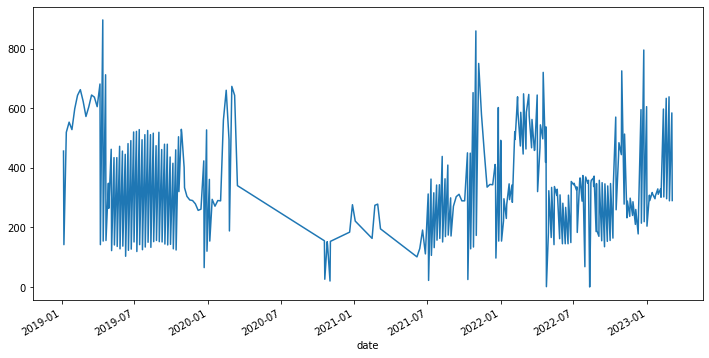

In [11]:
(traffic_df
 .query ('home_airport == "NTE" and paired_airport =="FUE"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total=('pax', 'sum'))
 .reset_index()
 .set_index('date')
 ['pax_total']
 .plot(figsize=(12,6))
 );

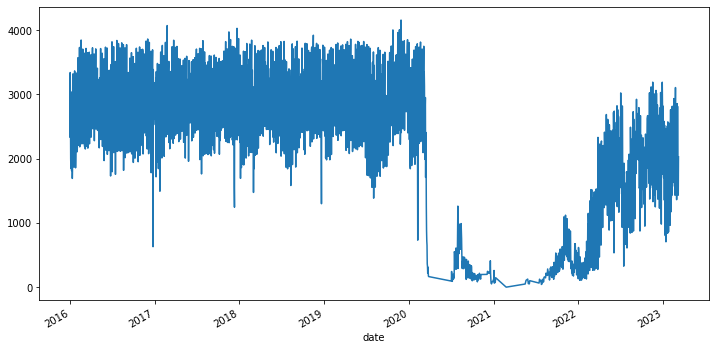

In [12]:
(traffic_df
 .query ('home_airport == "LGW" and paired_airport =="AMS"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total=('pax', 'sum'))
 .reset_index()
 .set_index('date')
 ['pax_total']
 .plot(figsize=(12,6))
 );

In [13]:
import seaborn as sns
sns.set()

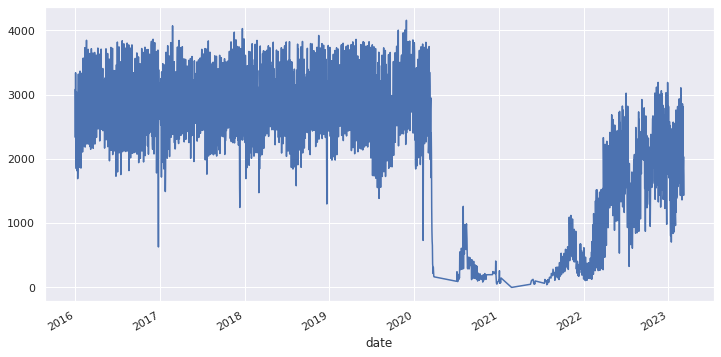

In [14]:
(traffic_df
 .query ('home_airport == "LGW" and paired_airport =="AMS"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total=('pax', 'sum'))
 .reset_index()
 .set_index('date')
 ['pax_total']
 .plot(figsize=(12,6))
 );

In [15]:
import datetime
import plotly
import plotly.offline as pyoff
import plotly.graph_objs as go

from plotly.subplots import make_subplots


def draw_ts_multiple(df: pd.DataFrame, v1: str, v2: str=None, prediction: str=None, date: str='date',
              secondary_y=True, covid_zone=False, display=True):
  """Draw times series possibly on two y axis, with COVID period option.

  Args:
  - df (pd.DataFrame): time series dataframe (one line per date, series in columns)
  - v1 (str | list[str]): name or list of names of the series to plot on the first x axis
  - v2 (str): name of the serie to plot on the second y axis (default: None)
  - prediction (str): name of v1 hat (prediction) displayed with a dotted line (default: None)
  - date (str): name of date column for time (default: 'date')
  - secondary_y (bool): use a secondary y axis if v2 is used (default: True)
  - covid_zone (bool): highlight COVID-19 period with a grayed rectangle (default: False)
  - display (bool): display figure otherwise just return the figure (default: True)

  Returns:
  - fig (plotly.graph_objs._figure.Figure): Plotly figure generated

  Notes:
  Make sure to use the semi-colon trick if you don't want to have the figure displayed twice.
  Or use `display=False`.
  """
  if isinstance(v1, str):
    variables = [(v1, 'V1')]
  else:
    variables = [(v, 'V1.{}'.format(i)) for i, v in enumerate(v1)]
  title = '<br>'.join([n + ': '+ v for v, n in variables]) + ('<br>V2: ' + v2) if v2 else '<br>'.join([v + ': '+ n for v, n in variables])
  layout = dict(
    title=title,
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
  )
  fig = make_subplots(specs=[[{"secondary_y": True}]])
  fig.update_layout(layout)
  for v, name in variables:
    fig.add_trace(go.Scatter(x=df[date], y=df[v], name=name), secondary_y=False)
  if v2:
    fig.add_trace(go.Scatter(x=df[date], y=df[v2], name='V2'), secondary_y=secondary_y)
    fig['layout']['yaxis2']['showgrid'] = False
    fig.update_yaxes(rangemode='tozero')
    fig.update_layout(margin=dict(t=125 + 30 * (len(variables) - 1)))
  if prediction:
    fig.add_trace(go.Scatter(x=df[date], y=df[prediction], name='^V1', line={'dash': 'dot'}), secondary_y=False)

  if covid_zone:
    fig.add_vrect(
        x0=pd.Timestamp("2020-03-01"), x1=pd.Timestamp("2022-01-01"),
        fillcolor="Gray", opacity=0.5,
        layer="below", line_width=0,
    )
  if display:
    pyoff.iplot(fig)
  return fig


In [16]:
draw_ts_multiple(
    (traffic_df
     .query('home_airport == "LGW" and paired_airport == "AMS"')
     .groupby(['home_airport', 'paired_airport', 'date'])
     .agg(pax_total=('pax', 'sum'))
     .reset_index()
    ),
    'pax_total',
    covid_zone=True,
)

time split cross validation

In [17]:
nte_fue_df=(traffic_df
 .query ('home_airport == "NTE" and paired_airport =="FUE"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total=('pax', 'sum'))
 .reset_index() 
 )
nte_fue_df

home_airport paired_airport       date  pax_total
0            NTE            FUE 2019-01-06      456.0
1            NTE            FUE 2019-01-07      142.0
2            NTE            FUE 2019-01-13      519.0
3            NTE            FUE 2019-01-20      553.0
4            NTE            FUE 2019-01-27      528.0
..           ...            ...        ...        ...
288          NTE            FUE 2023-02-19      296.0
289          NTE            FUE 2023-02-25      638.0
290          NTE            FUE 2023-02-26      289.0
291          NTE            FUE 2023-03-04      584.0
292          NTE            FUE 2023-03-05      290.0

[293 rows x 4 columns]

In [18]:
nte_ams_df=(traffic_df
 .query ('home_airport == "LGW" and paired_airport =="AMS"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total=('pax', 'sum'))
 .reset_index() 
 )
nte_ams_df

home_airport paired_airport       date  pax_total
0             LGW            AMS 2016-01-01     3081.0
1             LGW            AMS 2016-01-02     2334.0
2             LGW            AMS 2016-01-03     3341.0
3             LGW            AMS 2016-01-04     2665.0
4             LGW            AMS 2016-01-05     1996.0
...           ...            ...        ...        ...
2243          LGW            AMS 2023-03-05     2815.0
2244          LGW            AMS 2023-03-06     1916.0
2245          LGW            AMS 2023-03-07     1741.0
2246          LGW            AMS 2023-03-08     1432.0
2247          LGW            AMS 2023-03-09     2029.0

[2248 rows x 4 columns]

### Models: 
•	Prophet (Stat/ML)
•	Nixtla (ML+DL)
•	Statmodels


##First model with Facebook

aiutano a debugger les problèmes
here we do the refactoring
docstring per mettere la documentazione

In [19]:
def generate_route_df(tarffic_df:pd.DataFrame, homeAirport: str, pairedAirport:str)-> pd.DataFrame:
  """Extract route dataframe from traffic dataFrame for route from home airport to paired airport
  Args:
  - traffic_df(pd.DataFrame): traffic dataframe
  - homeAirport (str): IATA Code for home airport
  - pairedAirport (str): IATA Code for paired airport

returns:
- pd.DataFrame: Aggregated daily PAX traffic on route (home-paired)
  """
  _df=(traffic_df
      .query ('home_airport == "{home}" and paired_airport =="{paired}"'.format(home=homeAirport, paired=pairedAirport))
      .groupby(['home_airport', 'paired_airport', 'date'])
      .agg(pax_total=('pax', 'sum'))
      .reset_index() 
       )
  return _df

_df: par convention and it means temporary variable, that's why we put the underscore or _ _df, it masked for the exterior user. 



In [20]:
generate_route_df(traffic_df, "LGW", "AMS")

home_airport paired_airport       date  pax_total
0             LGW            AMS 2016-01-01     3081.0
1             LGW            AMS 2016-01-02     2334.0
2             LGW            AMS 2016-01-03     3341.0
3             LGW            AMS 2016-01-04     2665.0
4             LGW            AMS 2016-01-05     1996.0
...           ...            ...        ...        ...
2243          LGW            AMS 2023-03-05     2815.0
2244          LGW            AMS 2023-03-06     1916.0
2245          LGW            AMS 2023-03-07     1741.0
2246          LGW            AMS 2023-03-08     1432.0
2247          LGW            AMS 2023-03-09     2029.0

[2248 rows x 4 columns]

In [21]:
from prophet import Prophet

Le modèle Prophet n'est pas capable de traiter plusieurs séries au meme temps, il faut sélectionner une série à la fois. 

In [22]:
baseline_model= Prophet()
baseline_model.fit(generate_route_df(traffic_df, "NTE", "FUE").rename(columns={'date':'ds', 'pax_total':'y'}))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfkbejqvo/gwm09zw3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfkbejqvo/nlrn9y9y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39942', 'data', 'file=/tmp/tmpfkbejqvo/gwm09zw3.json', 'init=/tmp/tmpfkbejqvo/nlrn9y9y.json', 'output', 'file=/tmp/tmpfkbejqvo/prophet_modeladf_4am2/prophet_model-20230318072400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:24:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [23]:
future_df=baseline_model.make_future_dataframe(periods=15) #prepare to predict 15 days
future_df

ds
0   2019-01-06
1   2019-01-07
2   2019-01-13
3   2019-01-20
4   2019-01-27
..         ...
303 2023-03-16
304 2023-03-17
305 2023-03-18
306 2023-03-19
307 2023-03-20

[308 rows x 1 columns]

In [24]:
forecast_df=baseline_model.predict(future_df)

ha fatto il fit sur les données historiques et avec le make future ha allungato il periodo per il futuro e il predict ha completato la funzione.

In [25]:
forecast_df

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2019-01-06  366.987264  316.808556  622.285473   366.987264   366.987264   
1   2019-01-07  366.754933   72.680417  373.034951   366.754933   366.754933   
2   2019-01-13  365.360946  275.208408  565.979331   365.360946   365.360946   
3   2019-01-20  363.734627  264.583676  574.214121   363.734627   363.734627   
4   2019-01-27  362.108309  327.414863  611.343137   362.108309   362.108309   
..         ...         ...         ...         ...          ...          ...   
303 2023-03-16  250.086252  -31.763219  267.726652   250.086252   250.086252   
304 2023-03-17  250.129075  261.128130  569.560877   250.129075   250.129075   
305 2023-03-18  250.171898  326.786317  617.395056   250.169239   250.171898   
306 2023-03-19  250.214721  360.901488  663.001674   250.209170   250.215019   
307 2023-03-20  250.257544  105.875260  417.652323   250.246595   250.259485   

     additive_terms  additive_terms_lower  additive_terms_upper      weekly  \
0        113.963365            113.963365            113.963365  136.806409   
1       -148.140453           -148.140453           -148.140453 -115.899406   
2         56.838713             56.838713             56.838713  136.806409   
3         49.792236             49.792236             49.792236  136.806409   
4        103.916880            103.916880            103.916880  136.806409   
..              ...                   ...                   ...         ...   
303     -132.497205           -132.497205           -132.497205 -256.348557   
304      168.375159            168.375159            168.375159   44.060402   
305      227.954512            227.954512            227.954512  103.260604   
306      261.821769            261.821769            261.821769  136.806409   
307        9.411225              9.411225              9.411225 -115.899406   

     weekly_lower  weekly_upper      yearly  yearly_lower  yearly_upper  \
0      136.806409    136.806409  -22.843043    -22.843043    -22.843043   
1     -115.899406   -115.899406  -32.241047    -32.241047    -32.241047   
2      136.806409    136.806409  -79.967696    -79.967696    -79.967696   
3      136.806409    136.806409  -87.014173    -87.014173    -87.014173   
4      136.806409    136.806409  -32.889528    -32.889528    -32.889528   
..            ...           ...         ...           ...           ...   
303   -256.348557   -256.348557  123.851352    123.851352    123.851352   
304     44.060402     44.060402  124.314757    124.314757    124.314757   
305    103.260604    103.260604  124.693908    124.693908    124.693908   
306    136.806409    136.806409  125.015360    125.015360    125.015360   
307   -115.899406   -115.899406  125.310631    125.310631    125.310631   

     multiplicative_terms  multiplicative_terms_lower  \
0                     0.0                         0.0   
1                     0.0                         0.0   
2                     0.0                         0.0   
3                     0.0                         0.0   
4                     0.0                         0.0   
..                    ...                         ...   
303                   0.0                         0.0   
304                   0.0                         0.0   
305                   0.0                         0.0   
306                   0.0                         0.0   
307                   0.0                         0.0   

     multiplicative_terms_upper        yhat  
0                           0.0  480.950629  
1                           0.0  218.614479  
2                           0.0  422.199658  
3                           0.0  413.526863  
4                           0.0  466.025189  
..                          ...         ...  
303                         0.0  117.589047  
304                         0.0  418.504234  
305                         0.0  478.126410  
306                         0.0  512.036491  
307       

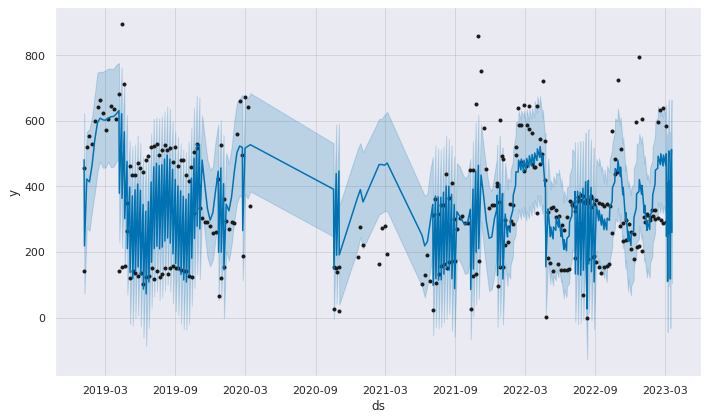

In [26]:
baseline_model.plot(forecast_df);

i puntini sono la realtà, dove c'era veramente traffico, la courbe bleu: previsione del modello e il blu più chiaro é l'intervallo di confidenza.
se non metto ; mi mette il risultato due volte. prophet affiche un graphique et le notebook affiche le meme encore. se metto ; faccio vedere solo una volta

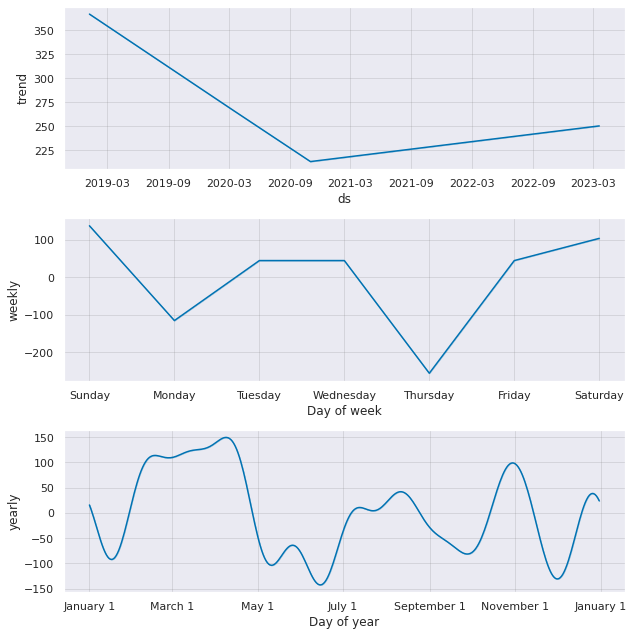

In [27]:
baseline_model.plot_components(forecast_df);

la tendance non é veramente rappresentativa della realtà perché non prende in conto il covid, per lui il traffico é passato a zero. quindi per aiutare il modello aggiungiamo una variable.

In [28]:
nte_fue_df.query('date<="2019-01-07"')

home_airport paired_airport       date  pax_total
0          NTE            FUE 2019-01-06      456.0
1          NTE            FUE 2019-01-07      142.0

## Evaluate the performance

eavluation: 
* Métrique:
  -RMSE radicesomme(y-y^)^2
  -MAPE valore assoluto (y-y^/y)
* Procédure:
  -CV (cross val) time split (on utilise principe de ripetizione con i fold mais on va pas casser la strutture de la série temporelle) 

In [29]:
from prophet.diagnostics import cross_validation

In [30]:
generate_route_df(traffic_df, "NTE", "FUE").date.nunique()

293

In [31]:
generate_route_df(traffic_df, "NTE", "FUE").date.min()

Timestamp('2019-01-06 00:00:00')

In [32]:
generate_route_df(traffic_df, "NTE", "FUE").date.max()

Timestamp('2023-03-05 00:00:00')

In [33]:
cross_validation(baseline_model, period='3 M', horizon='3 M')

<ipython-input-33-733d5c4d36cc>:1: FutureWarning:

Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.

INFO:prophet:Making 205 forecasts with cutoffs between 2020-01-11 23:57:00 and 2023-03-04 23:57:00


  0%|          | 0/205 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfkbejqvo/kdapdj5o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfkbejqvo/01qmh62p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37005', 'data', 'file=/tmp/tmpfkbejqvo/kdapdj5o.json', 'init=/tmp/tmpfkbejqvo/01qmh62p.json', 'output', 'file=/tmp/tmpfkbejqvo/prophet_modelyaeethyz/prophet_model-20230318072402.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:24:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfkbejqvo/6a8azgnt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfkbejqvo/wkejnlyn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

ds        yhat  yhat_lower  yhat_upper      y              cutoff
0   2020-01-12  475.865491  386.996914  563.500191  294.0 2020-01-11 23:57:00
1   2020-01-19  384.458569  303.515933  468.296576  271.0 2020-01-18 23:57:00
2   2020-01-26  375.182226  288.497547  462.207339  290.0 2020-01-25 23:57:00
3   2020-02-02  420.833404  340.022378  506.979035  289.0 2020-02-01 23:57:00
4   2020-02-09  439.861349  356.317853  524.539855  560.0 2020-02-08 23:57:00
..         ...         ...         ...         ...    ...                 ...
200 2023-02-19  535.589820  387.375193  675.581297  296.0 2023-02-18 23:57:00
201 2023-02-25  462.559519  316.992084  618.874544  638.0 2023-02-24 23:57:00
202 2023-02-26  518.447660  366.758880  676.401878  289.0 2023-02-25 23:57:00
203 2023-03-04  454.763658  304.796734  606.559702  584.0 2023-03-03 23:57:00
204 2023-03-05  518.536343  364.097236  658.625956  290.0 2023-03-04 23:57:00

[205 rows x 6 columns]

In [34]:
eval_df=cross_validation(baseline_model, initial='366 days',period='90 days', horizon='90 days')

INFO:prophet:Making 10 forecasts with cutoffs between 2020-09-16 00:00:00 and 2022-12-05 00:00:00


  0%|          | 0/10 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfkbejqvo/8qoab7oc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfkbejqvo/9zqn9sv6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16253', 'data', 'file=/tmp/tmpfkbejqvo/8qoab7oc.json', 'init=/tmp/tmpfkbejqvo/9zqn9sv6.json', 'output', 'file=/tmp/tmpfkbejqvo/prophet_modelwe4454z1/prophet_model-20230318072440.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:24:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:24:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfkbejqvo/96ik43jh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfkbejqvo/av8ec_y3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [35]:
eval_df

ds        yhat  yhat_lower  yhat_upper      y     cutoff
0   2020-10-18  447.472952  354.343242  538.786994  155.0 2020-09-16
1   2020-10-19  124.280990   28.576692  217.774742   26.0 2020-09-16
2   2020-10-25  488.585274  404.697812  576.219404  152.0 2020-09-16
3   2020-10-26  153.801841   55.783271  245.979439  139.0 2020-09-16
4   2020-11-01  439.584883  341.570415  529.832349   20.0 2020-09-16
..         ...         ...         ...         ...    ...        ...
189 2023-02-19  562.993455  430.260646  707.888504  296.0 2022-12-05
190 2023-02-25  465.255019  317.969576  602.945946  638.0 2022-12-05
191 2023-02-26  553.509927  414.074007  682.342466  289.0 2022-12-05
192 2023-03-04  465.385062  332.247447  604.102377  584.0 2022-12-05
193 2023-03-05  555.602132  423.209626  679.398017  290.0 2022-12-05

[194 rows x 6 columns]

In [36]:
from prophet.diagnostics import performance_metrics

In [37]:
performance_metrics(eval_df)

INFO:prophet:Skipping MAPE because y close to 0


horizon           mse        rmse         mae     mdape     smape  coverage
0  10 days   7964.572025   89.244451   72.291339  0.209460  0.282279  0.684211
1  11 days   9346.762087   96.678654   78.280908  0.227023  0.317436  0.657895
2  12 days  12625.430698  112.362942   86.326633  0.209460  0.325730  0.684211
3  13 days  13687.832616  116.995011   90.400662  0.229651  0.334530  0.657895
4  14 days  12874.968302  113.467918   85.317102  0.192882  0.318882  0.684211
..     ...           ...         ...         ...       ...       ...       ...
76 86 days  35044.098263  187.200690  154.016154  0.566636  0.616390  0.403509
77 87 days  31087.535293  176.316577  150.802874  0.497562  0.555897  0.368421
78 88 days  28591.350991  169.089772  142.621852  0.445899  0.528505  0.368421
79 89 days  24919.942869  157.860517  131.487817  0.388496  0.490253  0.473684
80 90 days  27910.967928  167.065759  140.636592  0.497562  0.575879  0.421053

[81 rows x 7 columns]

in  days the average error made is 72

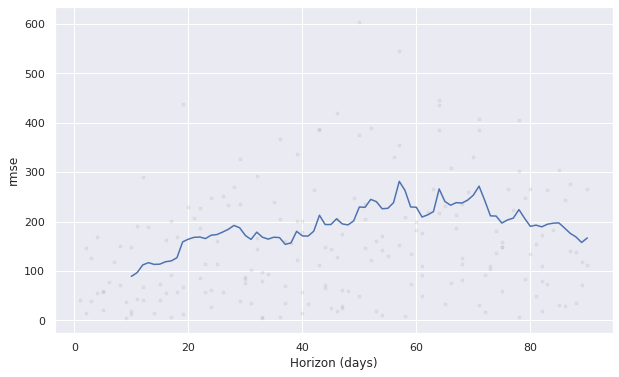

In [38]:
from prophet.plot import plot_cross_validation_metric

plot_cross_validation_metric(eval_df, metric='rmse');

## Automate model fitting and evaluation

mi trasforma ogni linea in dictionnaire 

In [39]:
routes=(traffic_df.drop_duplicates(subset=['home_airport','paired_airport'])
[['home_airport', 'paired_airport']]
.to_dict(orient='rows')
)


<ipython-input-39-23443b1322c2>:1: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.



initialiser à vide les dict, 
prendre couples uniques de home et paired airp et mettre dans une liste... 
dans le rmse je prend la première valeur


In [40]:
import logging
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)

In [41]:
models = dict()
performances = dict()
for route in routes: 
  #print(route)
  home=route['home_airport']
  paired=route['paired_airport']

  #Build route traffic dataframe
  _df=generate_route_df(traffic_df, home, paired)

  #Create a model 
  _model=Prophet()

  #Fit the model
  _model.fit(_df.rename(columns={'date':'ds', 'pax_total':'y'}))

  #Cross validate the model
  _cv_df=cross_validation(_model, horizon='90 days', parallel='processes')
  _perf_df=performance_metrics(_cv_df, rolling_window=1)

  #Save results
  models[(route['home_airport'], route['paired_airport'])]=_model
  performances[(route['home_airport'], route['paired_airport'])]=_perf_df['rmse'].values[0]


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 49 forecasts with cutoffs between 2017-01-10 00:00:00 and 2022-12-10 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f0d2eeec5e0>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 49 forecasts with cutoffs between 2017-01-09 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f0d2ef29b50>
INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 49 forecasts with cutoffs between 2017-01-09 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f0d2eefbd30>
INFO:prophet:Disabl

In [42]:
models

{('LGW', 'BCN'): <prophet.forecaster.Prophet at 0x7f0d2ee7c580>,
 ('LGW', 'AMS'): <prophet.forecaster.Prophet at 0x7f0d2ef29190>,
 ('LIS', 'ORY'): <prophet.forecaster.Prophet at 0x7f0d2ee7cf40>,
 ('LIS', 'OPO'): <prophet.forecaster.Prophet at 0x7f0d2ef29fa0>,
 ('SSA', 'GRU'): <prophet.forecaster.Prophet at 0x7f0d2eeec400>,
 ('NTE', 'FUE'): <prophet.forecaster.Prophet at 0x7f0d2eeec9d0>,
 ('LYS', 'PIS'): <prophet.forecaster.Prophet at 0x7f0d2ef19be0>,
 ('PNH', 'NGB'): <prophet.forecaster.Prophet at 0x7f0d2efb05e0>,
 ('POP', 'JFK'): <prophet.forecaster.Prophet at 0x7f0d2edf1640>,
 ('SCL', 'LHR'): <prophet.forecaster.Prophet at 0x7f0d2ef0d4c0>}

In [43]:
performances

{('LGW', 'BCN'): 1252.80455530257,
 ('LGW', 'AMS'): 927.4295007587415,
 ('LIS', 'ORY'): 871.9787557259463,
 ('LIS', 'OPO'): 607.0948037131809,
 ('SSA', 'GRU'): 1952.9757983596164,
 ('NTE', 'FUE'): 192.23652122836083,
 ('LYS', 'PIS'): 632.5392618552802,
 ('PNH', 'NGB'): 1562.754400403463,
 ('POP', 'JFK'): 76.63391104712609,
 ('SCL', 'LHR'): 146.91799138474485}

joblib: pour la sérialisation, enregister dans un objet à utiliser ensuite

## Save models

In [44]:
from prophet.serialize import model_to_json, model_from_json

for model in models: 
  _filename = 'route_model_prophet_{home}_{paired}.json'.format(home=model[0],paired=model[1])
  with open(_filename, 'w') as f: 
    f.write(model_to_json(models[model]))


In [45]:
reload_models = dict()

In [46]:
for route in routes:
  _filename = 'route_model_prophet_{home}_{paired}.json'.format(home=route['home_airport'],paired=route['paired_airport'])
  with open(_filename, 'r') as f: 
    reload_models[(route['home_airport'], route['paired_airport'])] =model_from_json(f.read())
  

/usr/local/lib/python3.9/dist-packages/prophet/serialize.py:160: FutureWarning:

The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')

/usr/local/lib/python3.9/dist-packages/prophet/serialize.py:160: FutureWarning:

The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')

/usr/local/lib/python3.9/dist-packages/prophet/serialize.py:160: FutureWarning:

The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimest

In [47]:
reload_models=dict()

en joblib les fichiers sont en fichiers pickle

In [48]:
from joblib import dump, load 

for model in models: 
  _filename = 'route_model_prophet_{home}_{paired}.joblib'.format(home=model[0],paired=model[1])
  dump(models[model], _filename)

In [49]:
reload_models=dict()
for route in routes:
  _filename = 'route_model_prophet_{home}_{paired}.joblib'.format(home=route['home_airport'],
                                                                  paired=route['paired_airport'])
  reload_models[(route['home_airport'], route['paired_airport'])] =load(_filename)

# Model with Nixtla

In [50]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from mlforecast import MLForecast
from numba import njit
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean

models = [
    lgb.LGBMRegressor(),
    xgb.XGBRegressor(),
    RandomForestRegressor(random_state=0),
]



@njit
def rolling_mean_28(x):
    return rolling_mean(x, window_size=28)


fcst = MLForecast(
    models=models,
    freq='D',
    lags=[7, 14, 21, 28],
    lag_transforms={
        1: [expanding_mean],
        7: [rolling_mean_28]
    },
    date_features=['dayofweek'],
    differences=[1],
)

mlforecast 
in time series
yt=f(yt-1, yt-2,...,yt-i, xt)


In [51]:
nixtla_model = fcst.fit(generate_route_df(traffic_df, "NTE", "FUE").drop(columns=['paired_airport']), id_col='home_airport', time_col='date', target_col='pax_total')

In [52]:
predict_df = nixtla_model.predict(14)
predict_df

home_airport       date  LGBMRegressor  XGBRegressor  RandomForestRegressor
0           NTE 2023-03-06     225.004578    240.563339                 168.33
1           NTE 2023-03-07     153.081434     69.187576                  -6.89
2           NTE 2023-03-08     203.201424     10.747890                 -70.19
3           NTE 2023-03-09     147.783229     79.026642                 -46.67
4           NTE 2023-03-10     119.458284    174.058075                  66.40
5           NTE 2023-03-11     152.527471    137.218658                 101.43
6           NTE 2023-03-12     184.736206    156.592697                 140.34
7           NTE 2023-03-13     199.381775     77.995232                  72.17
8           NTE 2023-03-14     111.636944   -137.341553                 -26.10
9           NTE 2023-03-15     418.200058   -210.858246                 -97.45
10          NTE 2023-03-16     305.818732   -204.258087                 -60.82
11          NTE 2023-03-17     339.055006   -115.430923                 -33.81
12          NTE 2023-03-18     277.485552      6.299873                  47.03
13          NTE 2023-03-19     331.545880     94.195770                 103.76

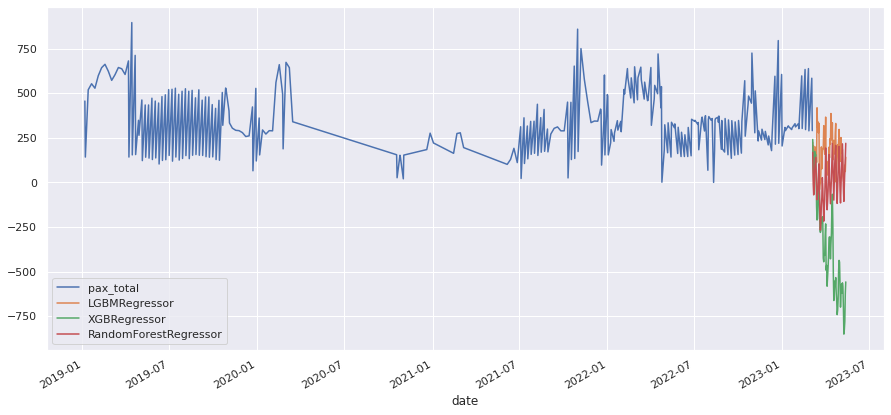

In [53]:
(pd.concat([generate_route_df(traffic_df, 'NTE', 'FUE').drop(columns=['paired_airport']),
            nixtla_model.predict(7*10)])
.set_index('date')
).plot(figsize=(15, 7));

In [54]:
nixtla_model = fcst.fit(generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']), id_col='home_airport', time_col='date', target_col='pax_total')

In [55]:
predict_df = nixtla_model.predict(14)
predict_df

home_airport       date  LGBMRegressor  XGBRegressor  RandomForestRegressor
0           LGW 2023-03-10    2522.142311   2416.332520                2447.83
1           LGW 2023-03-11    1375.064901   1125.572388                1219.15
2           LGW 2023-03-12    2385.056909   1795.271851                2252.45
3           LGW 2023-03-13    1667.920360   1334.042480                1824.71
4           LGW 2023-03-14    1650.751786   1582.571167                1633.86
5           LGW 2023-03-15    1418.832738   1090.876709                1259.96
6           LGW 2023-03-16    2099.141695   1895.774170                2080.54
7           LGW 2023-03-17    2409.705368   2147.150146                2365.46
8           LGW 2023-03-18    1465.166364   1006.790649                1080.81
9           LGW 2023-03-19    2544.719226   1646.215820                2135.46
10          LGW 2023-03-20    1903.983106   1334.463745                1858.66
11          LGW 2023-03-21    1468.840952   1440.680298                1535.54
12          LGW 2023-03-22    1461.127450   1616.794922                1597.83
13          LGW 2023-03-23    2089.815550   2439.141602                2501.09

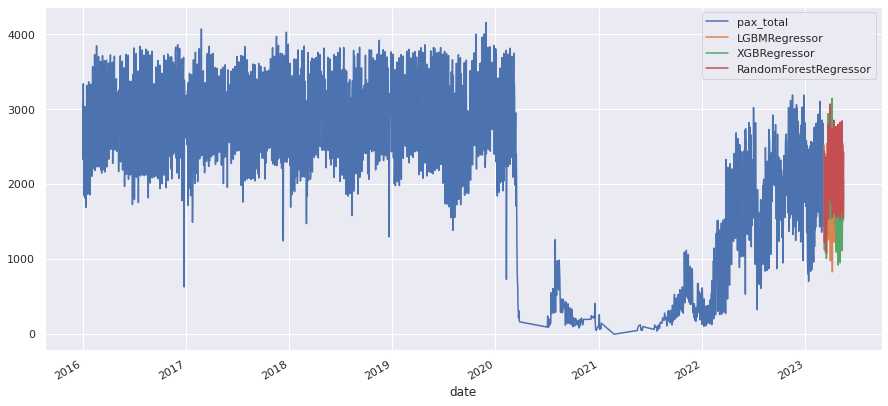

In [56]:
(pd.concat([generate_route_df(traffic_df, 'LGW', 'AMS').drop(columns=['paired_airport']),
            nixtla_model.predict(7*10)])
.set_index('date')
).plot(figsize=(15, 7));

In [57]:
draw_ts_multiple((pd.concat([generate_route_df(traffic_df, 'LGW', 'AMS').drop(columns=['paired_airport']),
                             nixtla_model.predict(7*10)])),
                 v1='pax_total', v2='LGBMRegressor');

In [58]:
crossvalidation_df = fcst.cross_validation(
    data=generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']),
    window_size=90,
    n_windows=5,
    id_col='home_airport',
    time_col='date',
    target_col='pax_total'
)

/usr/local/lib/python3.9/dist-packages/mlforecast/forecast.py:548: UserWarning:

Excuting `cross_validation` after `fit` can produce unexpected errors



In [59]:
crossvalidation_df

home_airport       date     cutoff  pax_total  LGBMRegressor  \
0            LGW 2021-12-15 2021-12-14      229.0     348.645547   
1            LGW 2021-12-16 2021-12-14      429.0     593.762678   
2            LGW 2021-12-17 2021-12-14      676.0     670.195026   
3            LGW 2021-12-18 2021-12-14      286.0     409.170319   
4            LGW 2021-12-19 2021-12-14      676.0     803.159270   
..           ...        ...        ...        ...            ...   
445          LGW 2023-03-05 2022-12-09     2815.0    1865.829097   
446          LGW 2023-03-06 2022-12-09     1916.0    2222.291755   
447          LGW 2023-03-07 2022-12-09     1741.0    2131.488022   
448          LGW 2023-03-08 2022-12-09     1432.0    2069.155381   
449          LGW 2023-03-09 2022-12-09     2029.0    2307.119953   

     XGBRegressor  RandomForestRegressor  
0      281.325165                 267.72  
1      508.705139                 428.76  
2      623.942871                 445.82  
3      532.024414                 339.56  
4      850.288818                 678.39  
..            ...                    ...  
445   2310.340332                1553.94  
446   2665.737549                1668.80  
447   1903.722290                1928.02  
448   1967.471924                2089.95  
449   2178.843750                2303.74  

[450 rows x 7 columns]

In [60]:
!pip install datasetsforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 35.9 MB/s eta 0:00:00


In [61]:
import numpy as np
from datasetsforecast.losses import rmse

def mse(y, y_hat):
  delta_y = np.square(y - y_hat)
  return np.nanmean(delta_y)

def rmse(y, y_hat):
  delta_y = np.square(y - y_hat)
  return np.sqrt(mse(y, y_hat))

cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['LGBMRegressor'])).mean()
print("LGBM RMSE using cross-validation: ", cv_rmse)
cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['RandomForestRegressor'])).mean()
print("RandomForest RMSE using cross-validation: ", cv_rmse)

cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['XGBRegressor'])).mean()
print("XGBoost RMSE using cross-validation: ", cv_rmse)

cv_rmse= (crossvalidation_df
          .assign(Ensemble=lambda _df:_df[['LGBMRegressor', 'RandomForestRegressor','XGBRegressor']].mean(axis=1))
          .groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['Ensemble'])).mean())

print("Ensemble RMSE using cross-validation: ", cv_rmse)


LGBM RMSE using cross-validation:  1123.0405776208863
RandomForest RMSE using cross-validation:  1013.2061289311698
XGBoost RMSE using cross-validation:  1220.3735710301205
Ensemble RMSE using cross-validation:  1047.6225207933953


cutoff dates dans lesquelles il a arreté ...
paradoxe de simpson


shap
shaplay values: mesures d'utilité


## Model with Neural Forecast

In [62]:
!pip install neuralforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 KB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 KB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 KB 40.2 MB/s eta 0:00:00
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.51.3
    Uninstalling grpcio-1.51.3:
      Successfully uninstalled grpcio-1.51.3
  Attempting uninstall

In [63]:
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS

In [64]:
horizon = 90
models = [NBEATS(input_size=2 * horizon, h=horizon, max_epochs=50),
          NHITS(input_size=2 * horizon, h=horizon, max_epochs=50)]

In [65]:
nforecast = NeuralForecast(models=models, freq='D')
nforecast.fit(df=generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']).rename(columns={'home_airport':'unique_id', 'date':'ds', 'pax_total':'y'}))

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

In [66]:
nforecast.predict().reset_index()

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

unique_id         ds       NBEATS        NHITS
0        LGW 2023-03-10  2310.547852  2104.245117
1        LGW 2023-03-11  1100.359985  1087.336548
2        LGW 2023-03-12  1911.781616  1971.682861
3        LGW 2023-03-13  2009.186768  2209.391602
4        LGW 2023-03-14  1681.576294  1472.562012
..       ...        ...          ...          ...
85       LGW 2023-06-03  1142.199585  1289.341919
86       LGW 2023-06-04  1955.284180  1927.884644
87       LGW 2023-06-05  2034.495361  2188.834473
88       LGW 2023-06-06  1595.225342  1472.211182
89       LGW 2023-06-07  1526.007446  1713.425903

[90 rows x 4 columns]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

<Axes: xlabel='ds'>

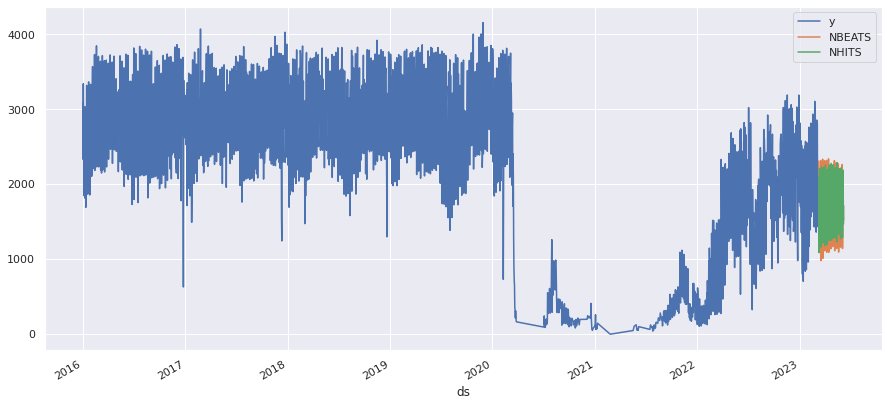

In [67]:
pd.concat(
    [
        generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']).rename(columns={'home_airport': 'unique_id',
                                                                                                     'date': 'ds',
                                                                                                     'pax_total': 'y'}),
        nforecast.predict().reset_index()
    ]
).set_index('ds').plot(figsize=(15,7))

app mobile (edge)

applications analitiques: permette anche una persona che non é datascientist di modificare ecc:
  - Notebook ipywidget
  -Streamlit
  -dash
  (Shiny sur R) RAD rapid development elle existe aussi sur python
  - bokeh non consigliata perché troppo complicata meglio utilizzare streamlit o dash


  maquettage de l'application

  wireframing 